In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

from scipy import stats

sns.set_style("darkgrid")
pd.options.mode.chained_assignment = None

In [2]:
path = 'C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive/*.csv'
input_files = glob.glob(path)

In [3]:
def file_load(path):
        
    for i, file in enumerate(input_files):
        print(file)
        globals()[f'df{i+1}'] = pd.read_csv(input_files[i])
    print(f'Total number of files loaded: {len(input_files)}')
    
file_load(path)

C:/Users/delst/OneDrive - Queen Mary, University of London/Desktop/VSCode/Advanced_Projects/Uber_Demand_Project/data_archive\uber.csv
Total number of files loaded: 1


In [4]:
df_store = [eval(f'df{i+1}') for i in range(len(input_files))]   # Dataframe preperation

---

# **Initial Exploration**

In [5]:
keys_list = [df_store[i].keys() for i in range(len(df_store))]
flattened_list = [item for sublist in keys_list for item in sublist]
unique_keys = list(set(flattened_list))

print('Number of unique keys:', len(unique_keys))
# print(keys_list)
unique_keys

Number of unique keys: 9


['pickup_datetime',
 'key',
 'passenger_count',
 'pickup_longitude',
 'dropoff_latitude',
 'fare_amount',
 'Unnamed: 0',
 'dropoff_longitude',
 'pickup_latitude']

In [6]:
df = df_store[0]
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df.describe().round()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.0,200000.0,200000.0,200000.0,199999.0,199999.0,200000.0
mean,27712504.0,11.0,-73.0,40.0,-73.0,40.0,2.0
std,16013822.0,10.0,11.0,8.0,13.0,7.0,1.0
min,1.0,-52.0,-1341.0,-74.0,-3357.0,-882.0,0.0
25%,13825346.0,6.0,-74.0,41.0,-74.0,41.0,1.0
50%,27745495.0,8.0,-74.0,41.0,-74.0,41.0,1.0
75%,41555301.0,12.0,-74.0,41.0,-74.0,41.0,2.0
max,55423567.0,499.0,57.0,1644.0,1154.0,873.0,208.0


In [8]:
# from sklearn.model_selection import StratifiedShuffleSplit

# X = df.drop('target_column', axis=1)
# y = df['target_column']

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
# for train_index, test_index in sss.split(X, y):
#     df_sample = df.iloc[test_index]

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 42.1 MB


In [10]:
memory_usage = df.memory_usage(deep=True)
print(memory_usage/1000000)

Index                 0.000128
Unnamed: 0            1.600000
key                  16.936069
fare_amount           1.600000
pickup_datetime      16.000000
pickup_longitude      1.600000
pickup_latitude       1.600000
dropoff_longitude     1.600000
dropoff_latitude      1.600000
passenger_count       1.600000
dtype: float64


In [11]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
for col in df:
  print(df[col].unique())

[24238194 27835199 44984355 ... 27804658 20259894 11951496]
['2015-05-07 19:52:06.0000003' '2009-07-17 20:04:56.0000002'
 '2009-08-24 21:45:00.00000061' ... '2009-06-29 00:42:00.00000078'
 '2015-05-20 14:56:25.0000004' '2010-05-15 04:08:00.00000076']
[ 7.5   7.7  12.9  ... 37.2  86.25 89.1 ]
['2015-05-07 19:52:06 UTC' '2009-07-17 20:04:56 UTC'
 '2009-08-24 21:45:00 UTC' ... '2009-06-29 00:42:00 UTC'
 '2015-05-20 14:56:25 UTC' '2010-05-15 04:08:00 UTC']
[-73.99981689 -73.994355   -74.005043   ... -73.969204   -74.003548
 -73.99712372]
[40.73835373 40.728225   40.74077    ... 40.74391937 40.72121
 40.72545242]
[-73.99951172 -73.99471    -73.962565   ... -73.95223999 -74.01390839
 -73.858957  ]
[40.72321701 40.750325   40.772647   ... 40.692588   40.6954155
 40.768793  ]
[  1   3   5   2   4   6   0 208]


In [13]:
count = df['passenger_count'].eq(208).sum()
count

1

In [14]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [15]:
df = df[['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime','passenger_count']]
df

,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,5
...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,1


---

# **Data Cleaning and Feature Engineering**

- Initial feature engineering will take place allowing us to later engineer our target variable
- Data cleaning will take place, including handling of NaNs and outlier removal
- Final feature engineering will take place, with the creation of our target variable PED

In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.tz_localize(None)
print((df.pickup_datetime.dtype))

datetime64[ns]


In [17]:
df['Label_Hour'] = df['pickup_datetime'].dt.hour
df['Label_Date'] = df['pickup_datetime'].dt.date
df['pickup_datetime'] = df['pickup_datetime'].dt.floor('H')
df['day_name'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
df['day_of_the_week'] = pd.to_datetime(df['pickup_datetime']).dt.weekday

In [18]:
df = df[(np.abs(stats.zscore(df['passenger_count'])) < 2)]
df = df[(np.abs(stats.zscore(df['fare_amount'])) < 2)]
df

,Unnamed: 0,key,fare_amount,pickup_datetime,passenger_count,Label_Hour,Label_Date,day_name,day_of_the_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:00:00,1,19,2015-05-07,Thursday,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:00:00,1,20,2009-07-17,Friday,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:00:00,1,21,2009-08-24,Monday,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:00:00,3,8,2009-06-26,Friday,4
5,44470845,2011-02-12 02:27:09.0000006,4.9,2011-02-12 02:00:00,1,2,2011-02-12,Saturday,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:00:00,1,10,2012-10-28,Sunday,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:00:00,1,1,2014-03-14,Friday,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:00:00,2,0,2009-06-29,Monday,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:00:00,1,14,2015-05-20,Wednesday,2


In [19]:
select_cols = ['pickup_datetime', 'fare_amount', 'passenger_count','Label_Date']
# Group the demand and price data by day using the pickup_datetime column to extract the date, and then use the pandas groupby() function to group the data by date.
dfh = df[select_cols].groupby('pickup_datetime').agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()
dfd = df[select_cols].groupby(['Label_Date'])['passenger_count','fare_amount'].agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()

display(dfh.describe(), dfd.describe())

C:\Users\delst\AppData\Local\Temp/ipykernel_53036/3314034989.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfd = df[select_cols].groupby(['Label_Date'])['passenger_count','fare_amount'].agg({'passenger_count':'mean','fare_amount':'mean'}).reset_index()


,passenger_count,fare_amount
count,49642.000000,49642.000000
mean,1.318290,9.714609
std,0.443541,3.744842
min,0.000000,-3.000000
25%,1.000000,7.220000
50%,1.166667,9.000000
75%,1.500000,11.416667
max,4.000000,31.100000


,passenger_count,fare_amount
count,2372.000000,2372.000000
mean,1.325536,9.646610
std,0.107412,0.984512
min,1.000000,6.732727
25%,1.250000,8.907859
50%,1.312500,9.558655
75%,1.388889,10.363672
max,1.795918,12.971864


In [20]:
threshold_f_up = dfh.fare_amount.quantile(0.99)
threshold_f_low = dfh.fare_amount.quantile(0.01)

threshold_p_up = dfh.passenger_count.quantile(0.99)
threshold_p_low = dfh.passenger_count.quantile(0.01)

dfh[['fare_amount']] = dfh[['fare_amount']].apply(lambda x: x.clip(threshold_f_low, threshold_f_up))
dfh[['passenger_count']] = dfd[['passenger_count']].apply(lambda x: x.clip(threshold_p_low, threshold_p_up))

display(dfh.describe(), dfd.describe())

,passenger_count,fare_amount
count,2372.000000,49642.000000
mean,1.325536,9.686452
std,0.107412,3.583548
min,1.000000,4.000000
25%,1.250000,7.220000
50%,1.312500,9.000000
75%,1.388889,11.416667
max,1.795918,23.300000


,passenger_count,fare_amount
count,2372.000000,2372.000000
mean,1.325536,9.646610
std,0.107412,0.984512
min,1.000000,6.732727
25%,1.250000,8.907859
50%,1.312500,9.558655
75%,1.388889,10.363672
max,1.795918,12.971864


In [21]:
# dfh['passenger_count_pct_change'] = dfh['passenger_count'].pct_change()
# dfh['fare_amount_pct_change'] = dfh['fare_amount'].pct_change()

# dfd['passenger_count_pct_change'] = dfd['passenger_count'].pct_change()
# dfd['fare_amount_pct_change'] = dfd['fare_amount'].pct_change()

dfh['passenger_count_pct_change'] = (dfh['passenger_count'].pct_change() / 0.1).round() * 0.1
dfh['fare_amount_pct_change'] = (dfh['fare_amount'].pct_change() / 0.1).round() * 0.1

dfd['passenger_count_pct_change'] = (dfd['passenger_count'].pct_change() / 0.1).round() * 0.1
dfd['fare_amount_pct_change'] = (dfd['fare_amount'].pct_change() / 0.1).round() * 0.1


display(dfh.describe(), dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change
count,2372.000000,49642.000000,49641.000000,49641.000000
mean,1.325536,9.686452,0.000191,0.123585
std,0.107412,3.583548,0.022019,0.583829
min,1.000000,4.000000,-0.300000,-0.800000
25%,1.250000,7.220000,0.000000,-0.300000
50%,1.312500,9.000000,0.000000,0.000000
75%,1.388889,11.416667,0.000000,0.400000
max,1.795918,23.300000,0.400000,4.800000


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change
count,2372.000000,2372.000000,2371.000000,2371.000000
mean,1.325536,9.646610,0.004007,0.005820
std,0.107412,0.984512,0.100698,0.099407
min,1.000000,6.732727,-0.300000,-0.300000
25%,1.250000,8.907859,-0.100000,-0.100000
50%,1.312500,9.558655,0.000000,0.000000
75%,1.388889,10.363672,0.100000,0.100000
max,1.795918,12.971864,0.400000,0.400000


In [22]:
dfh['PED_hour'] = (dfh.passenger_count_pct_change / dfh.fare_amount_pct_change)
dfd['PED_day'] = (dfd.passenger_count_pct_change / dfd.fare_amount_pct_change)
# dfg2['PED_week'] = (dfg2.passenger_count_sma_week_pct_change / dfg2.fare_amount_sma_week_pct_change)

dfh = dfh.iloc[1:,:].round(4)
dfd = dfd.iloc[1:,:].round(4)

In [23]:
display(dfh.describe(), dfd.describe())

,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_hour
count,2371.000000,49641.000000,49641.000000,49641.000000,45377.0
mean,1.325394,9.686431,0.000191,0.123585,NaN
std,0.107205,3.583581,0.022019,0.583829,NaN
min,1.000000,4.000000,-0.300000,-0.800000,-inf
25%,1.250000,7.220000,0.000000,-0.300000,0.0
50%,1.312500,9.000000,0.000000,0.000000,0.0
75%,1.388900,11.416700,0.000000,0.400000,0.0
max,1.795900,23.300000,0.400000,4.800000,inf


,passenger_count,fare_amount,passenger_count_pct_change,fare_amount_pct_change,PED_day
count,2371.000000,2371.000000,2371.000000,2371.000000,1965.0
mean,1.325394,9.646648,0.004007,0.005820,NaN
std,0.107205,0.984719,0.100698,0.099407,NaN
min,1.000000,6.732700,-0.300000,-0.300000,-inf
25%,1.250000,8.906950,-0.100000,-0.100000,-1.0
50%,1.312500,9.558100,0.000000,0.000000,0.0
75%,1.388900,10.363700,0.100000,0.100000,1.0
max,1.795900,12.971900,0.400000,0.400000,inf


In [ ]:
# threshold_f_up = dfh.fare_amount.quantile(0.99)
# threshold_f_low = dfh.fare_amount.quantile(0.01)

# threshold_p_up = dfh.passenger_count.quantile(0.99)
# threshold_p_low = dfh.passenger_count.quantile(0.01)

# dfh[['fare_amount']] = dfh[['fare_amount']].apply(lambda x: x.clip(threshold_f_low, threshold_f_up))
# dfh[['passenger_count']] = dfd[['passenger_count']].apply(lambda x: x.clip(threshold_p_low, threshold_p_up))

<AxesSubplot:>

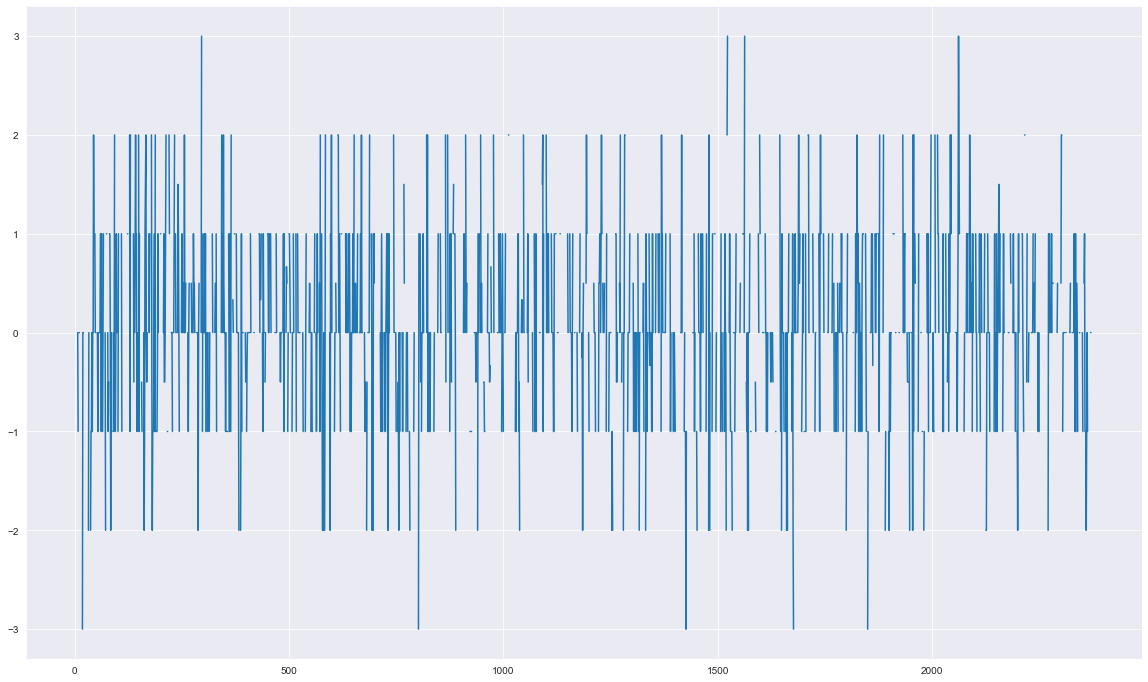

In [24]:
dfd.PED_day.plot(figsize=(20,12))